<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202b/BigMac/BigMacVAEXAssignment_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Dataset(Rate.csv)


Medical datasets are electronic collections of data that are related to the healthcare industry. It uses a virtual memory approach to allow processing of large datasets that do not fit in memory. Vaex also provides a variety of functions for data visualization and exploration. Pandas is another popular Python library for data manipulation and analysis. It is well-suited for small to medium-sized datasets that can be loaded into memory, but it can become slow and unwieldy when working with large datasets. In this assignment, we will show you how which library are the most suitable to use with large dataset. 

# **Dataset: Health Insurance Marketplace**

**Group members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>Muhammad Imran Hakimi Bin Mohd Shukri </th>
    <th>A20EC0213</th>
  </tr>
  <tr>
    <th>Afif Hazmie Arsyad Bin Agus</th>
    <th>A20EC0176</th>
  </tr>
    <tr>
    <th>Kong Jia Rou</th>
    <th>A20EC0198</th>
  </tr>
    <tr>
    <th>Rasmin Kaur Sandhu</th>
    <th>A19ET0216</th>
  </tr>
</table>





In [ ]:
pip install -U matplotlib

In [ ]:
!pip install vaex

In [ ]:
!pip install vaex-viz


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pull dataset from my google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/110mZHE08iW3Kbio-XCcASizLcpU2qFAV/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Rate.csv') 

##Importing Libraries

In [ ]:
#importing vaex library
import vaex as vx

In [ ]:
#importing pandas library
import pandas as pd

In [ ]:
#Import seaborn and matplotlib for pandas
import matplotlib.pyplot as plt
import seaborn as sns

##Reading CSV Files

In [ ]:
#reading csv files with vaex

startreadvx = time.time()

df_vx=vx.open("/content/drive/MyDrive/Colab Notebooks/Rate.csv")
df_vx.head()

endreadvx = time.time()
timereadvx = endreadvx - startreadvx
print(timereadvx, "s")

31.101299285888672 s


In [ ]:
#reading csv files with pandas

startreadpd = time.time()

df_pd=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rate.csv")
df_pd.head()

endreadpd = time.time()
timereadpd = endreadpd - startreadpd
print(timereadpd, "s")

84.47494173049927 s


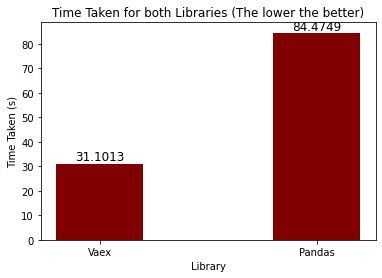

In [ ]:
x = ['Vaex', 'Pandas']
y = [timereadvx, timereadpd]


 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

# add value labels to the bars
ax = plt.gca()  # get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel("Library")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken for both Libraries (The lower the better)")
plt.show()

##Creating New Column

In [ ]:
#creating new column with vaex (will create a virtual column)

startnewvx = time.time()

df_vx['new_TotalIndividualRate'] = df_vx['IndividualRate'] * 100
df_vx.head()

endnewvx = time.time()
timenewvx = endnewvx - startnewvx
print(timenewvx, "s")

0.0026464462280273438 s


In [ ]:
#creating new column with pandas

startnewpd = time.time()

df_pd['new_TotalIndividualRate'] = df_pd['IndividualRate'] * 100
df_pd.head()

endnewpd = time.time()
timenewpd = endnewpd - startnewpd
print(timenewpd, "s")

0.12589478492736816 s


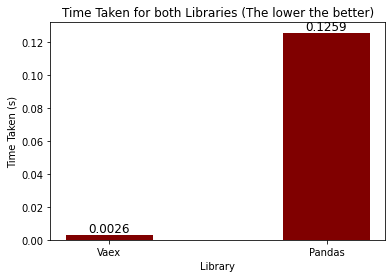

In [ ]:
x = ['Vaex', 'Pandas']
y = [timenewvx, timenewpd]


 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

# add value labels to the bars
ax = plt.gca()  # get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel("Library")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken for both Libraries (The lower the better)")
plt.show()

##Data Cleaning (Filtering)

In [ ]:
#filtering data with vaex

startfiltervx = time.time()

df_vx_filtered = df_vx[df_vx['BusinessYear']==2015]
df_vx_filtered

endfiltervx = time.time()
timefiltervx = endfiltervx - startfiltervx
print(timefiltervx, "s")

0.024999618530273438 s


In [ ]:
#filtering data with pandas

startfilterpd = time.time()

df_pd_filtered = df_pd[df_pd['BusinessYear']==2015]
df_pd_filtered

endfilterpd = time.time()
timefilterpd = endfilterpd - startfilterpd
print(timefilterpd, "s")

1.592756986618042 s


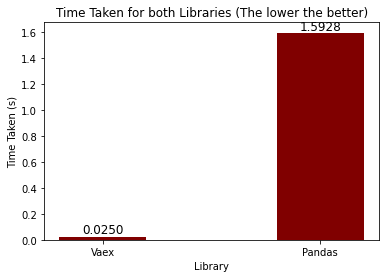

In [ ]:
x = ['Vaex', 'Pandas']
y = [timefiltervx, timefilterpd]


 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

# add value labels to the bars
ax = plt.gca()  # get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel("Library")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken for both Libraries (The lower the better)")
plt.show()

##Data Cleaning (Dropping NaN values)

In [ ]:
#dropping NaN with vaex

startdropvx = time.time()

dropna_vx=df_vx.dropna()

enddropvx = time.time()
timedropvx = enddropvx - startdropvx
print(timedropvx, "s")

1.602386713027954 s


In [ ]:
#dropping NaN with pandas

startdroppd = time.time()

dropna_pd=df_pd.dropna()

enddroppd = time.time()
timedroppd = enddroppd - startdroppd
print(timedroppd, "s")

8.333130836486816 s


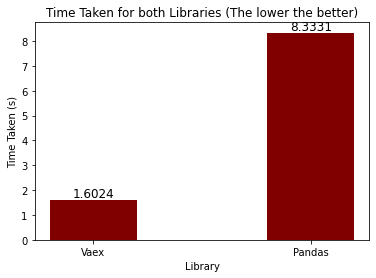

In [ ]:
x = ['Vaex', 'Pandas']
y = [timedropvx, timedroppd]


 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

# add value labels to the bars
ax = plt.gca()  # get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel("Library")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken for both Libraries (The lower the better)")
plt.show()

##String Processing


In [ ]:
#string processing using vaex

startstringvx = time.time()

df_vx.SourceName.str.upper()

endstringvx = time.time()
timestringvx = endstringvx - startstringvx
print(timestringvx, "s")

0.004681825637817383 s


In [ ]:
#string procesing using pandas

startstringpd = time.time()

df_pd.SourceName.str.upper()

endstringpd = time.time()
timestringpd = endstringpd - startstringpd
print(timestringpd, "s")

5.228800296783447 s


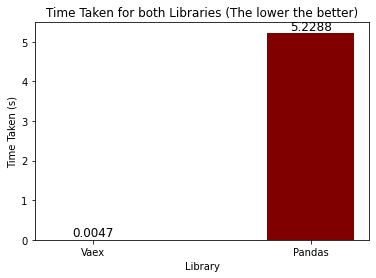

In [ ]:
x = ['Vaex', 'Pandas']
y = [timestringvx, timestringpd]


 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

# add value labels to the bars
ax = plt.gca()  # get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel("Library")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken for both Libraries (The lower the better)")
plt.show()

##Performing Simple Computation

In [ ]:
startcomputevx = time.time()

df_vx.IndividualRate + df_vx.IndividualRate

endcomputevx = time.time()
timecomputevx = endcomputevx - startcomputevx
print(timecomputevx, "s")

0.0003681182861328125 s


In [ ]:
startcomputepd = time.time()

df_pd['IndividualRate'] + df_pd['IndividualRate']

endcomputepd = time.time()
timecomputepd = endcomputepd - startcomputepd
print(timecomputepd, "s")

0.03741860389709473 s


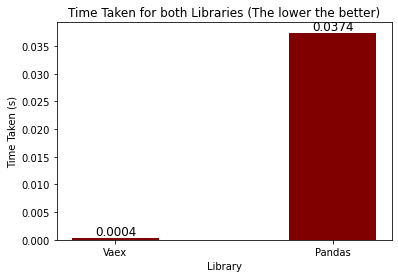

In [ ]:
x = ['Vaex', 'Pandas']
y = [timecomputevx, timecomputepd]


 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

# add value labels to the bars
ax = plt.gca()  # get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel("Library")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken for both Libraries (The lower the better)")
plt.show()

##GroupBy Operation

In [ ]:
startgroupbyvx = time.time()

df_vx.groupby(df_vx.BusinessYear)

endgroupbyvx = time.time()
timegroupbyvx = endgroupbyvx - startgroupbyvx
print(timegroupbyvx, "s")

8.023757934570312 s


In [ ]:
startgroupbypd = time.time()

df_pd.groupby(df_pd['BusinessYear'])

endgroupbypd = time.time()
timegroupbypd = endgroupbypd - startgroupbypd
print(timegroupbypd, "s")

0.0005929470062255859 s


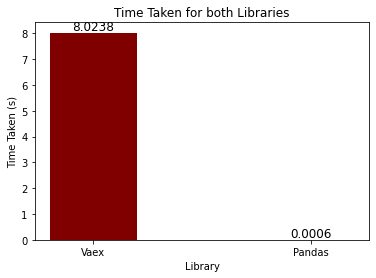

In [ ]:
x = ['Vaex', 'Pandas']
y = [timegroupbyvx, timegroupbypd]


 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

# add value labels to the bars
ax = plt.gca()  # get current axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel("Library")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken for both Libraries")
plt.show()

# Plotting 1D Visualization with dataframe from vaex and pandas

**Using Vaex**

CPU times: user 18.4 s, sys: 3.31 s, total: 21.7 s
Wall time: 14.7 s


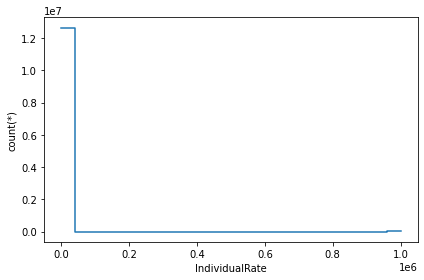

In [ ]:
%%time
df_vx.viz.histogram('IndividualRate', shape=(25))

**Using Pandas**

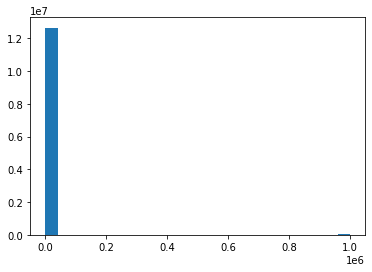

CPU times: user 566 ms, sys: 110 ms, total: 676 ms
Wall time: 574 ms


In [ ]:
%%time
import matplotlib.pyplot as plt

x = df_pd['IndividualRate']
plt.hist(x, bins=25)
plt.show()

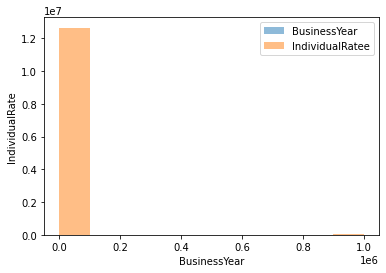

CPU times: user 18.9 s, sys: 3.76 s, total: 22.6 s
Wall time: 17.1 s


In [ ]:
%%time
# Select the columns of data you want to plot
data1 = df_vx['BusinessYear']
data2 = df_vx['IndividualRate']

# Set the labels for the x-axis and y-axis
plt.xlabel('BusinessYear')
plt.ylabel('IndividualRate')

# Create the histogram
plt.hist(data1, alpha=0.5, label='BusinessYear')
plt.hist(data2, alpha=0.5, label='IndividualRatee')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

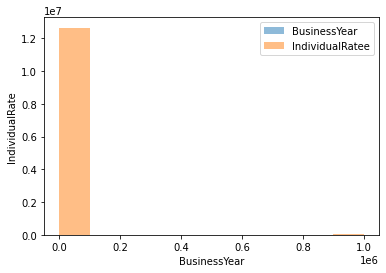

CPU times: user 905 ms, sys: 148 ms, total: 1.05 s
Wall time: 928 ms


In [ ]:
%%time
# Select the columns of data you want to plot
data1 = df_pd['BusinessYear']
data2 = df_pd['IndividualRate']

# Set the labels for the x-axis and y-axis
plt.xlabel('BusinessYear')
plt.ylabel('IndividualRate')

# Create the histogram
plt.hist(data1, alpha=0.5, label='BusinessYear')
plt.hist(data2, alpha=0.5, label='IndividualRatee')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()